In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from talib import RSI, BBANDS,WILLR,MACD
import re
import talib as ta
from sklearn.model_selection import train_test_split
from sklearn import svm 
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report
from sklearn.model_selection import GridSearchCV
import random
from sklearn import svm 

# Importing DATA

In [4]:
data=pd.read_csv('india.csv')
#data.set_index('Date',inplace=True)

# Functions Used

In [ ]:
def Scaler(x):
    a=x-x.min()
    b=x.max()-x.min()
    c=-1+2*a/b
    return np.array(c)

# Cleaning DATA

In [6]:
for data in [data]:
    for columns in data.columns :
        data[columns] = data[columns].apply(lambda x : re.sub(r'[^0-9.]+','',x))

In [ ]:
data.info()

In [ ]:
data.describe()

In [7]:
data = data.iloc[::-1]

# ADDING INDICATORS

In [8]:
high=data.High
low=data.Low
open=data.Open
close=data.Price.astype(float)


In [9]:
sma=ta.SMA(close, 20)
ema=ta.EMA(close, 12)
macd, macdsignal, macdhist=ta.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9) #MACD>MSIG= BUY signal
rsi=ta.RSI(close, timeperiod=14)
slowk,slowd=ta.STOCH(high,low,close,fastk_period=14)
roc = ta.ROC(close, timeperiod=10)
willr=ta.WILLR(high, low, close) #above -20 overbought below -80 oversold
trix = ta.TRIX(close, timeperiod=5)
sar=ta.SAR(high,low)
cci=ta.CCI(high,low,close)
atr=ta.ATR(high,low,close,timeperiod=14)
adx=ta.ADX(high,low,close,timeperiod=14)
upper, middle, lower=ta.BBANDS(close, timeperiod=20)

In [10]:
dict={"Close":close,"SMA":sma,"EMA":ema,"MACD":macd, 
      "RSI":rsi,"WillR":willr,"Slowk":slowk,"Slowd":slowd,"ROC":roc,"TRIX":trix,'SAR':sar,'CCI':cci,'ATR':atr,'ADX':adx,'Upper':upper,'Lower':lower}
featuredata=pd.DataFrame(data=dict)
featuredata.dropna(inplace=True)

In [11]:
featuredata["ups and downs"]=featuredata["Close"].shift(-1)-featuredata["Close"]
featuredata

,Close,SMA,EMA,MACD,RSI,WillR,Slowk,Slowd,ROC,TRIX,SAR,CCI,ATR,ADX,Upper,Lower,ups and downs
2465,5256.15,5192.4175,5258.155418,84.028470,52.713948,-29.960721,78.993713,82.826954,0.647218,0.186613,5362.518740,28.096284,80.340619,16.002832,5429.548639,4955.286361,56.35
2464,5312.50,5207.0500,5266.516123,82.598727,56.456214,-18.836806,80.867655,81.663620,1.512416,0.142534,5357.449990,23.416409,82.484146,14.908491,5435.748032,4978.351968,-61.10
2463,5251.40,5214.0950,5264.190566,75.663188,51.680279,-46.776156,68.142106,76.001158,-0.444562,0.074834,5348.602991,-18.535109,82.338850,13.892317,5439.113368,4989.076632,-14.30
2462,5237.10,5219.1750,5260.022786,68.226361,50.601362,-66.249361,56.045892,68.351885,-0.484551,0.004962,5340.286812,-76.231755,80.146789,12.955250,5441.437123,4996.912877,-1.20
2461,5235.90,5229.2700,5256.311588,61.526553,50.506074,-81.679151,35.098444,53.095481,-2.193040,-0.048478,5332.469603,-107.363275,76.343447,12.085117,5434.674003,5023.865997,53.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,10167.45,9431.6600,9762.374392,233.199789,68.513729,-10.931985,91.908760,92.612351,12.481124,0.997444,9443.567131,104.730676,237.688059,18.545585,10302.303313,8561.016687,-120.80
3,10046.65,9472.0325,9806.109101,238.602987,64.069782,-19.395795,89.024008,91.231621,11.270289,0.869788,9585.156390,78.301364,239.974626,19.336472,10377.424345,8566.640655,69.50
2,10116.15,9518.0125,9853.807701,245.661299,65.457950,-15.614545,84.685892,88.539553,8.601227,0.744501,9704.091368,66.253542,230.826439,20.070866,10455.603616,8580.421384,-214.15
1,9902.00,9543.9350,9861.221901,231.308566,58.019629,-31.361447,77.876071,83.861990,4.340313,0.543956,9803.996749,37.590646,230.845979,19.970076,10493.809962,8594.060038,70.90


In [12]:
featuredata["direction"]=featuredata.apply(lambda x:1 if x["ups and downs"]>0 else (-1 if x["ups and downs"]<0 else 0), axis=1) 
#featuredata["direction"]=featuredata.apply(lambda x:-1 if x["ups and downs"]<0 else 0, axis=1)
#featuredata.dropna(inplace=True)
featuredata

,Close,SMA,EMA,MACD,RSI,WillR,Slowk,Slowd,ROC,TRIX,SAR,CCI,ATR,ADX,Upper,Lower,ups and downs,direction
2465,5256.15,5192.4175,5258.155418,84.028470,52.713948,-29.960721,78.993713,82.826954,0.647218,0.186613,5362.518740,28.096284,80.340619,16.002832,5429.548639,4955.286361,56.35,1
2464,5312.50,5207.0500,5266.516123,82.598727,56.456214,-18.836806,80.867655,81.663620,1.512416,0.142534,5357.449990,23.416409,82.484146,14.908491,5435.748032,4978.351968,-61.10,-1
2463,5251.40,5214.0950,5264.190566,75.663188,51.680279,-46.776156,68.142106,76.001158,-0.444562,0.074834,5348.602991,-18.535109,82.338850,13.892317,5439.113368,4989.076632,-14.30,-1
2462,5237.10,5219.1750,5260.022786,68.226361,50.601362,-66.249361,56.045892,68.351885,-0.484551,0.004962,5340.286812,-76.231755,80.146789,12.955250,5441.437123,4996.912877,-1.20,-1
2461,5235.90,5229.2700,5256.311588,61.526553,50.506074,-81.679151,35.098444,53.095481,-2.193040,-0.048478,5332.469603,-107.363275,76.343447,12.085117,5434.674003,5023.865997,53.15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,10167.45,9431.6600,9762.374392,233.199789,68.513729,-10.931985,91.908760,92.612351,12.481124,0.997444,9443.567131,104.730676,237.688059,18.545585,10302.303313,8561.016687,-120.80,-1
3,10046.65,9472.0325,9806.109101,238.602987,64.069782,-19.395795,89.024008,91.231621,11.270289,0.869788,9585.156390,78.301364,239.974626,19.336472,10377.424345,8566.640655,69.50,1
2,10116.15,9518.0125,9853.807701,245.661299,65.457950,-15.614545,84.685892,88.539553,8.601227,0.744501,9704.091368,66.253542,230.826439,20.070866,10455.603616,8580.421384,-214.15,-1
1,9902.00,9543.9350,9861.221901,231.308566,58.019629,-31.361447,77.876071,83.861990,4.340313,0.543956,9803.996749,37.590646,230.845979,19.970076,10493.809962,8594.060038,70.90,1


In [13]:
featuredata=featuredata.reset_index(drop=True)
featuredata

,Close,SMA,EMA,MACD,RSI,WillR,Slowk,Slowd,ROC,TRIX,SAR,CCI,ATR,ADX,Upper,Lower,ups and downs,direction
0,5256.15,5192.4175,5258.155418,84.028470,52.713948,-29.960721,78.993713,82.826954,0.647218,0.186613,5362.518740,28.096284,80.340619,16.002832,5429.548639,4955.286361,56.35,1
1,5312.50,5207.0500,5266.516123,82.598727,56.456214,-18.836806,80.867655,81.663620,1.512416,0.142534,5357.449990,23.416409,82.484146,14.908491,5435.748032,4978.351968,-61.10,-1
2,5251.40,5214.0950,5264.190566,75.663188,51.680279,-46.776156,68.142106,76.001158,-0.444562,0.074834,5348.602991,-18.535109,82.338850,13.892317,5439.113368,4989.076632,-14.30,-1
3,5237.10,5219.1750,5260.022786,68.226361,50.601362,-66.249361,56.045892,68.351885,-0.484551,0.004962,5340.286812,-76.231755,80.146789,12.955250,5441.437123,4996.912877,-1.20,-1
4,5235.90,5229.2700,5256.311588,61.526553,50.506074,-81.679151,35.098444,53.095481,-2.193040,-0.048478,5332.469603,-107.363275,76.343447,12.085117,5434.674003,5023.865997,53.15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,10167.45,9431.6600,9762.374392,233.199789,68.513729,-10.931985,91.908760,92.612351,12.481124,0.997444,9443.567131,104.730676,237.688059,18.545585,10302.303313,8561.016687,-120.80,-1
2462,10046.65,9472.0325,9806.109101,238.602987,64.069782,-19.395795,89.024008,91.231621,11.270289,0.869788,9585.156390,78.301364,239.974626,19.336472,10377.424345,8566.640655,69.50,1
2463,10116.15,9518.0125,9853.807701,245.661299,65.457950,-15.614545,84.685892,88.539553,8.601227,0.744501,9704.091368,66.253542,230.826439,20.070866,10455.603616,8580.421384,-214.15,-1
2464,9902.00,9543.9350,9861.221901,231.308566,58.019629,-31.361447,77.876071,83.861990,4.340313,0.543956,9803.996749,37.590646,230.845979,19.970076,10493.809962,8594.060038,70.90,1


In [14]:
featuredata1=featuredata.dropna()
featuredata1

,Close,SMA,EMA,MACD,RSI,WillR,Slowk,Slowd,ROC,TRIX,SAR,CCI,ATR,ADX,Upper,Lower,ups and downs,direction
0,5256.15,5192.4175,5258.155418,84.028470,52.713948,-29.960721,78.993713,82.826954,0.647218,0.186613,5362.518740,28.096284,80.340619,16.002832,5429.548639,4955.286361,56.35,1
1,5312.50,5207.0500,5266.516123,82.598727,56.456214,-18.836806,80.867655,81.663620,1.512416,0.142534,5357.449990,23.416409,82.484146,14.908491,5435.748032,4978.351968,-61.10,-1
2,5251.40,5214.0950,5264.190566,75.663188,51.680279,-46.776156,68.142106,76.001158,-0.444562,0.074834,5348.602991,-18.535109,82.338850,13.892317,5439.113368,4989.076632,-14.30,-1
3,5237.10,5219.1750,5260.022786,68.226361,50.601362,-66.249361,56.045892,68.351885,-0.484551,0.004962,5340.286812,-76.231755,80.146789,12.955250,5441.437123,4996.912877,-1.20,-1
4,5235.90,5229.2700,5256.311588,61.526553,50.506074,-81.679151,35.098444,53.095481,-2.193040,-0.048478,5332.469603,-107.363275,76.343447,12.085117,5434.674003,5023.865997,53.15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2460,10142.15,9385.8625,9688.724281,210.611711,68.083198,-2.600197,92.762097,93.183381,11.375704,1.038566,9324.040850,110.894552,239.952525,17.148876,10190.750241,8580.974759,25.30,1
2461,10167.45,9431.6600,9762.374392,233.199789,68.513729,-10.931985,91.908760,92.612351,12.481124,0.997444,9443.567131,104.730676,237.688059,18.545585,10302.303313,8561.016687,-120.80,-1
2462,10046.65,9472.0325,9806.109101,238.602987,64.069782,-19.395795,89.024008,91.231621,11.270289,0.869788,9585.156390,78.301364,239.974626,19.336472,10377.424345,8566.640655,69.50,1
2463,10116.15,9518.0125,9853.807701,245.661299,65.457950,-15.614545,84.685892,88.539553,8.601227,0.744501,9704.091368,66.253542,230.826439,20.070866,10455.603616,8580.421384,-214.15,-1


# SVM with Grid SearchCV

In [15]:
X=featuredata1[['SMA','EMA','MACD','RSI','WillR','Slowk','Slowd','ROC','TRIX','SAR','CCI','ATR','ADX','Upper','Lower']]
y=featuredata1["direction"]
RescaledX=Scaler(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(RescaledX, y, test_size=0.30, shuffle=False)

In [21]:
from sklearn.model_selection import GridSearchCV 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']} 

clf = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
clf.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   12.6s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [22]:
clf.score(X_test,y_test)

0.5594594594594594

In [23]:
clf.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

# PCA

In [24]:
X=featuredata1[['SMA','EMA','MACD','RSI','WillR','Slowk','Slowd','ROC','TRIX','SAR','CCI','ATR','ADX','Upper','Lower']]
y=featuredata1["direction"]
RescaledX=Scaler(X)

In [25]:
from sklearn.decomposition import PCA
pca= PCA(n_components=3)
x = pca.fit_transform(X)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, shuffle=False)

In [27]:
from sklearn.model_selection import GridSearchCV 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']} 

clf = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3,n_jobs = -1 ) 
clf.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   16.6s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [28]:
clf.score(X_test,y_test)

0.5297297297297298

# Kernel- PCA

In [29]:
X=featuredata1[['SMA','EMA','MACD','RSI','WillR','Slowk','Slowd','ROC','TRIX','SAR','CCI','ATR','ADX','Upper','Lower']]
y=featuredata1["direction"]
RescaledX=Scaler(X)

In [30]:
from sklearn.decomposition import KernelPCA
pca= KernelPCA(n_components=3,kernel = 'rbf')
x = pca.fit_transform(X)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, shuffle=False)

In [34]:
clf = svm.SVC(C = 10,kernel = 'rbf', gamma = 'scale')
clf.fit(X_train,y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [35]:
clf.score(X_test,y_test)

0.5297297297297298

# Genetic Algorithm

In [36]:
RFC = svm.SVC()

In [37]:
class GeneticSelector():
    def __init__(self, estimator, n_gen, size, n_best, n_rand, 
                 n_children, mutation_rate):
        # Estimator 
        self.estimator = estimator
        # Number of generations
        self.n_gen = n_gen
        # Number of chromosomes in population
        self.size = size
        # Number of best chromosomes to select
        self.n_best = n_best
        # Number of random chromosomes to select
        self.n_rand = n_rand
        # Number of children created during crossover
        self.n_children = n_children
        # Probablity of chromosome mutation
        self.mutation_rate = mutation_rate
        
        #if int((self.n_best + self.n_rand) / 2) * self.n_children != self.size:
            #raise ValueError("The population size is not stable.")  
    
    def initialization(self):
        population=[]
        for i in range(self.size):  # size-no. of chromosomes in population
            chromosome=np.ones(self.n_features,dtype=np.bool) #makes an array of true
            mask=np.random.rand(len(chromosome))<0.3 #makes a boolean array when the value of the random int is <0.3 returns true.
            chromosome[mask]=False #when the mask array is having a true then at this position chromosome array is changed from true to false.
            population.append(chromosome)
        return population
    def fitness(self,population):
        scores=[]
        X, y = self.dataset
        X=pd.DataFrame(data=Scaler(X))
        X_train = X[:int(X.shape[0]*0.7)]
        X_test = X[int(X.shape[0]*0.7):]
        y_train = y[:int(X.shape[0]*0.7)]
        y_test = y[int(X.shape[0]*0.7):]
        for chromosome in population:
            RFC.fit(X_train.iloc[:,chromosome],y_train)
            predictions = RFC.predict(X_test.iloc[:,chromosome])            
            scores.append(accuracy_score(y_test,predictions))
        scores, population = np.array(scores), np.array(population) #to sort the scores list its converted to array
        inds=np.argsort(scores)[::-1] # reversed the order to get indices in descending order of the values.
        return list(scores[inds]), list(population[inds,:]) #sorted scores array is converted into list and the population of chromosomes is arranged according to scores
    
    def select(self, population_sorted):
        population_next = []
        for i in range(self.n_best):
            population_next.append(population_sorted[i]) #these are best selected parents
        for i in range(self.n_rand):
            population_next.append(random.choice(population_sorted)) #these are randomly selected parents
            random.shuffle(population_next)
        return population_next    
    
    def crossover(self,population):  #adding  crossover  method to our class, which mixes the genes of the previously selected   n_best+n_rand  parents.
        population_next=[]
        for i in range(int(len(population)/2)): #is done as 2 parents(chromosomes) are reqd for a child.
            for j in range(self.n_children):
                chromosome1,chromosome2=population[i], population[len(population)-1-i]  #mating criteria is first and last parent from population.-1 is there because index starts from 0 whereas length starts from 1.
                child = chromosome1
                mask = np.random.rand(len(child))>0.5 # with 50% probability genes are mutated
                child[mask]=chromosome2[mask] #when mask is true the chromosome2 boolean values are put into the child with same indexes.
                population_next.append(child)
        return population_next
    
    def mutate(self,population):
        population_next=[]
        for i in range(len(population)):
            chromosome=population[i]
            if random.random()<self.mutation_rate: # 2 probabilites are involved here 1 is self mutation rate and other is 0.05.
                mask=np.random.rand(len(chromosome))<0.05
                chromosome[mask]=False
            population_next.append(chromosome)
        return population_next
    
    def generate(self,population):
        #selection crossover and mutation
        scores_sorted,population_sorted=self.fitness(population)
        population=self.select(population_sorted)
        population=self.crossover(population)
        population=self.mutate(population)
    
        #History ( saves the best results of each generation.)
        self.chromosomes_best.append(population_sorted[0])
        self.scores_best.append(scores_sorted[0])
        self.scores_avg.append(np.mean(scores_sorted))
    
        return population
    
    def fit(self,X,y): #pass data and perform genetic algorithm
        
        self.chromosomes_best = []
        self.scores_best, self.scores_avg  = [], []
        
        self.dataset = X, y
        self.n_features = X.shape[1]
        
        population = self.initialization()
        for i in range(self.n_gen):
            population = self.generate(population)
            
        return self 
    @property
    def support_(self): # returns a chromosome with the best features (the best chromosome from the last generation).
        return self.chromosomes_best[-1] 
 
    def plot_scores(self):
        plt.plot(self.scores_best, label='Best')
        plt.plot(self.scores_avg, label='Average')
        plt.legend(loc="best")
        plt.ylabel('Scores')
        plt.xlabel('Generation')
        plt.show()

In [38]:
X=featuredata1[['SMA','EMA','MACD','RSI','WillR','Slowk','Slowd','CCI','ATR','ADX','Upper','Lower']]
y=featuredata1["direction"]

In [39]:
sel = GeneticSelector(estimator=RFC,n_gen=20, size=50, n_best=20, n_rand=20, 
                      n_children=20, mutation_rate=0.05)

In [40]:
sel.fit(X,y)

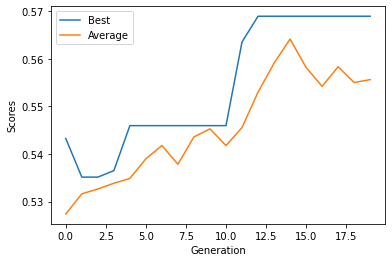

In [41]:
sel.plot_scores()

In [42]:
sel.scores_best

[0.5432432432432432,
 0.5351351351351351,
 0.5351351351351351,
 0.5364864864864864,
 0.5459459459459459,
 0.5459459459459459,
 0.5459459459459459,
 0.5459459459459459,
 0.5459459459459459,
 0.5459459459459459,
 0.5459459459459459,
 0.5635135135135135,
 0.5689189189189189,
 0.5689189189189189,
 0.5689189189189189,
 0.5689189189189189,
 0.5689189189189189,
 0.5689189189189189,
 0.5689189189189189,
 0.5689189189189189]

# Feature Selection using GA

In [43]:
sel.chromosomes_best

[array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True]),
 array([False,  True,  True, False,  True, False,  True, False, False,
         True,  True, False]),
 array([False,  True,  True,  True,  True,  True, False, False, False,
         True,  True,  True]),
 array([False,  True,  True,  True,  True,  True, False, False,  True,
         True,  True,  True]),
 array([False, False,  True,  True,  True,  True, False,  True,  True,
         True, False, False]),
 array([False, False,  True,  True,  True,  True, False,  True,  True,
         True, False, False]),
 array([False, False,  True, False,  True,  True, False, False,  True,
         True, False, False]),
 array([False, False,  True,  True,  True,  True, False,  True,  True,
         True, False, False]),
 array([False, False,  True,  True,  True,  True, False,  True,  True,
         True, False, False]),
 array([False, False,  True,  True,  True,  True, False, False,  True,
         Tr

In [45]:
sel.support_


array([False, False, False,  True,  True, False, False, False,  True,
       False, False, False])

In [46]:
X.head(2)

,SMA,EMA,MACD,RSI,WillR,Slowk,Slowd,CCI,ATR,ADX,Upper,Lower
0,5192.4175,5258.155418,84.028470,52.713948,-29.960721,78.993713,82.826954,28.096284,80.340619,16.002832,5429.548639,4955.286361
1,5207.0500,5266.516123,82.598727,56.456214,-18.836806,80.867655,81.663620,23.416409,82.484146,14.908491,5435.748032,4978.351968


In [57]:
X1 = featuredata1[['RSI','WillR','ATR']]
y1 = featuredata1[['direction']]

In [58]:
X=pd.DataFrame(data=Scaler(X1))
X

,0,1,2
0,0.142076,0.409702,-0.872950
1,0.249533,0.635857,-0.864129
2,0.112395,0.067834,-0.864727
3,0.081414,-0.328067,-0.873748
4,0.078678,-0.641763,-0.889400
...,...,...,...
2460,0.583395,0.965956,-0.216105
2461,0.595757,0.796567,-0.225424
2462,0.468152,0.624493,-0.216014
2463,0.508012,0.701367,-0.253661


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.30, shuffle=False)

In [60]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']} 


#a based model
RFC = svm.SVC()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = RFC, param_grid = param_grid, 
                          cv = tscv, n_jobs = -1, verbose = 2)

In [61]:
grid_search.fit(X_train,y_train)
grid_search.score(X_test,y_test)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    2.5s finished


0.5297297297297298

In [62]:
grid_search.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [63]:
clf = svm.SVC()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.5297297297297298

# PSO with Genetic Algorithm

In [16]:
X=featuredata[['EMA','MACD','RSI','WillR','Slowk','Slowd','ROC','TRIX','SAR','CCI','ATR','ADX']]
y=featuredata["direction"]
X=pd.DataFrame(data=Scaler(X))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=False)

C:\Users\Acer\anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


RESULT:
Optimal solution: [47.25191034262282, 2]
Objective function value: 0.5405405405405406


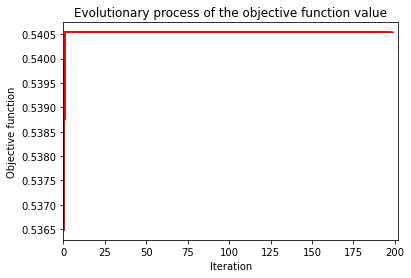

In [17]:
import random
import time
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------
def objective_function(O):
    a = int(O[0])
    b = float(O[1])
    RFC=svm.SVC(C = a, gamma = b)
    RFC.fit(X_train,y_train)
    predictions=RFC.predict(X_test)    
    z = accuracy_score(y_test,predictions)
    return z
 
bounds = [(10,100),(1,2)]  # upper and lower bounds of variables[(Xmin,Xmax),(Ymin,ymax)]
nv = 2  # number of variables
mm = 1  # if minimization problem, mm = -1; if maximization problem, mm = 1
 
# PARAMETERS OF PSO
particle_size = 120  # number of particles
iterations = 200  # max number of iterations
w = 0.8  # inertia constant
c1 = 1  # cognative constant
c2 = 2  # social constant
 
# Visualization
fig = plt.figure()
ax = fig.add_subplot()
fig.show()
plt.title('Evolutionary process of the objective function value')
plt.xlabel("Iteration")
plt.ylabel("Objective function")
# ------------------------------------------------------------------------------
class Particle:
    def __init__(self, bounds):
        self.particle_position = []  # particle position
        self.particle_velocity = []  # particle velocity
        self.local_best_particle_position = []  # best position of the particle
        self.fitness_local_best_particle_position = initial_fitness  # initial objective function value of the best particle position
        self.fitness_particle_position = initial_fitness  # objective function value of the particle position
 
        for i in range(nv):
            self.particle_position.append(
                random.uniform(bounds[i][0], bounds[i][1]))  # generate random initial position
            self.particle_velocity.append(random.uniform(-1, 1))  # generate random initial velocity
 
    def evaluate(self, objective_function):
        self.fitness_particle_position = objective_function(self.particle_position)
        if mm == -1:
            if self.fitness_particle_position < self.fitness_local_best_particle_position:
                self.local_best_particle_position = self.particle_position  # update the local best
                self.fitness_local_best_particle_position = self.fitness_particle_position  # update the fitness of the local best
        if mm == 1:
            if self.fitness_particle_position > self.fitness_local_best_particle_position:
                self.local_best_particle_position = self.particle_position  # update the local best
                self.fitness_local_best_particle_position = self.fitness_particle_position  # update the fitness of the local best
 
    def update_velocity(self, global_best_particle_position):
        for i in range(nv):
            r1 = random.random()
            r2 = random.random()
 
            cognitive_velocity = c1 * r1 * (self.local_best_particle_position[i] - self.particle_position[i])
            social_velocity = c2 * r2 * (global_best_particle_position[i] - self.particle_position[i])
            self.particle_velocity[i] = w * self.particle_velocity[i] + cognitive_velocity + social_velocity
 
    def update_position(self, bounds):
        for i in range(nv):
            self.particle_position[i] = self.particle_position[i] + self.particle_velocity[i]
 
            # check and repair to satisfy the upper bounds
            if self.particle_position[i] > bounds[i][1]:
                self.particle_position[i] = bounds[i][1]
            # check and repair to satisfy the lower bounds
            if self.particle_position[i] < bounds[i][0]:
                self.particle_position[i] = bounds[i][0]
 
class PSO:
    def __init__(self, objective_function, bounds, particle_size, iterations):
        fitness_global_best_particle_position = initial_fitness
        global_best_particle_position = []
        swarm_particle = []
        for i in range(particle_size):
            swarm_particle.append(Particle(bounds))
        A = []
 
        for i in range(iterations):
            for j in range(particle_size):
                swarm_particle[j].evaluate(objective_function)
 
                if mm == -1:
                    if swarm_particle[j].fitness_particle_position < fitness_global_best_particle_position:
                        global_best_particle_position = list(swarm_particle[j].particle_position)
                        fitness_global_best_particle_position = float(swarm_particle[j].fitness_particle_position)
                if mm == 1:
                    if swarm_particle[j].fitness_particle_position > fitness_global_best_particle_position:
                        global_best_particle_position = list(swarm_particle[j].particle_position)
                        fitness_global_best_particle_position = float(swarm_particle[j].fitness_particle_position)
            for j in range(particle_size):
                swarm_particle[j].update_velocity(global_best_particle_position)
                swarm_particle[j].update_position(bounds)
 
            A.append(fitness_global_best_particle_position)  # record the best fitness
            # Visualization
            ax.plot(A, color='r')
            fig.canvas.draw()
            ax.set_xlim(left=max(0, i - iterations), right=i + 3)
            time.sleep(0.001)
        print('RESULT:')
        print('Optimal solution:', global_best_particle_position)
        print('Objective function value:', fitness_global_best_particle_position)
# ------------------------------------------------------------------------------
if mm == -1:
    initial_fitness = float("inf")  # for minimization problem
if mm == 1:
    initial_fitness = -float("inf")  # for maximization problem
# ------------------------------------------------------------------------------
# Main PSO
PSO(objective_function, bounds, particle_size, iterations)
plt.show()